In [1]:
import numpy as np 
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
print(os.listdir('/content/drive/MyDrive/NLP/Sentiment Analysis'))

['IMDB Dataset.csv', 'Sentiment Analysis on IMDB Dataset.ipynb']


In [4]:
data = pd.read_csv('/content/drive/MyDrive/NLP/Sentiment Analysis/IMDB Dataset.csv') 

In [5]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
data.shape

(50000, 2)

In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Splitting the Dataset

In [9]:
#Train Dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


# Removing HTML Tags

In [10]:
from bs4 import BeautifulSoup
import re 

In [11]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

# Removing Special Characters

In [12]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

# Stemming

In [13]:
import nltk
nltk.download('punkt')
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Sentence and Word Tokenization

In [14]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'had', 'up', 'yourself', 'out', 'has', 'through', 'any', 'some', 'him', 'such', 'herself', 'those', 'all', 'can', 'my', 'couldn', 'being', 'until', "didn't", 'ourselves', "it's", 'that', 'from', 'or', 'an', 'again', "you're", 'them', 'are', 'mustn', "aren't", 'which', 'should', 'hadn', 'off', 'm', 'during', 're', 'mightn', 'with', 'theirs', 'because', 'on', 'then', 'more', 'nor', 't', 'weren', 'as', 'own', 'so', 'other', 'their', 'having', 'than', "shan't", "hadn't", 'll', 'only', 'does', 'yours', 'am', "mightn't", 'to', 'the', 'both', 'wasn', 'into', 'no', 'been', "hasn't", 'there', 'when', 'few', 'his', 'if', 'under', "mustn't", 'shan', 's', 'haven', 'wouldn', 'it', 'for', 'ours', "you'll", 'your', "weren't", 'ain', 'have', 'o', 'y', 'its', 'here', 'before', 'i', 'why', 'is', 'ma', 'will', 'these', 'not', 'were', 'do', 'above', 'too', 'her', 'don', 'he', "couldn't", 'a', 'below', "wasn't", 'our', 'shouldn', 'how', 'down', 'each', 'aren', 'doing', 've', "you've", 'very', 'against', '

In [16]:
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [17]:
norm_test_reviews=data.review[40000:]
norm_test_reviews[41203]

'watch made televis film destruct waco texa wa obvious heavili slant toward claim david koresh wa murder child rape cult leader hellbent kill mani cop want take hi peopl heaven blood stain stairwayth film wa littl propaganda detail alreadi read newspap sure sinc watch great documentari waco rule engag everi assert made thi film taken god truth tell whole stori rather regurgit onli law enforc decid tellfor forgot koresh wa spiritu leader religi movement name branch davidian charg drug use kidnap illeg weapon ownership statutori rape among im sure rais suspicion local polic later feder law enforc attempt serv search warrant atf bureau alcohol tobacco firearm clan particip shoot left deceas wound sidesit wa feder bureau investig fbi got involv commun two spirit eventu broke fbi prepar invas assault build flashbang grenad ga build burnt ground kill mani within includ koresh fbi refus admit respons say cult insid must set fire themselv thi hearken imag jim jone violent religi organizationst

# Count Vectorization

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_train: (40000, 6207046)
BOW_cv_test: (10000, 6207046)


# TF-IDF Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6207046)
Tfidf_test: (10000, 6207046)


In [20]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [21]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Training on Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


# Predicting the Testset

In [23]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Accuracy on Testset

In [25]:
lr_bow_score=accuracy_score(lr_bow_predict,test_sentiments)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7508
lr_tfidf_score : 0.75


In [26]:
cv_test_reviews.shape

(10000, 6207046)

# Classification Report (Logistic Regression)

In [27]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [47]:
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3764 1243]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


# Confusion Matrix (Logistic Regression)

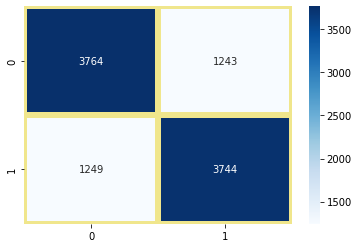

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
confusion_matrix = cm_bow
sns.heatmap(confusion_matrix,annot = True,fmt='d',cmap='Blues',linewidths=5,linecolor='khaki')

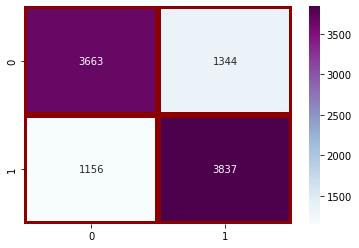

In [85]:
fig = plt.figure()
confusion_matrix = cm_tfidf
sns.heatmap(confusion_matrix,annot = True,fmt='d',cmap='BuPu',linewidths=5,linecolor='darkred')

# Training on Multinomial Naive Bayes 

In [31]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


# Prediction on Testset

In [32]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


# Accuracy on Testset

In [34]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7508
mnb_tfidf_score : 0.7507


# Classification Report (Multonimial Naive Bayes)

In [33]:
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [37]:
mnb_bow_predict.shape

(10000,)

In [41]:
cm_bow1=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow1)
#confusion matrix for tfidf features
cm_tfidf1=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf1)

[[3734 1273]
 [1219 3774]]
[[3726 1281]
 [1212 3781]]


# Confusion Matrix (Multinomial Naive Bayes)

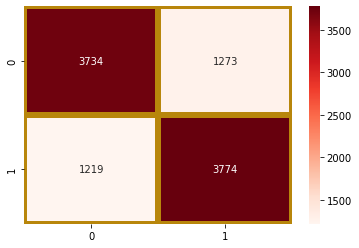

In [81]:
fig = plt.figure()
confusion_matrix = cm_bow1
sns.heatmap(confusion_matrix,annot = True,fmt='d',cmap='Reds',linewidths=5,linecolor='darkgoldenrod')

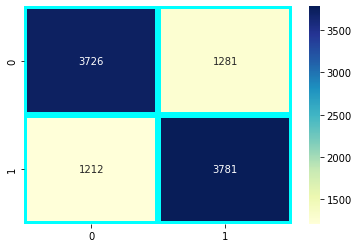

In [79]:
fig = plt.figure()
confusion_matrix = cm_tfidf1
sns.heatmap(confusion_matrix,annot = True,fmt='d',cmap="YlGnBu",linewidths=5,linecolor='cyan')